In [1]:
import tensorflow as tf
import numpy as np
tf.compat.v1.disable_eager_execution()

In [2]:
sess = tf.compat.v1.Session()
hello = tf.constant("Hello")
result = sess.run(hello)
print(result)

sess.close()


b'Hello'


In [3]:
a = tf.constant(2)
b = tf.constant(3)
c = tf.constant([2,6,3,8])
d = tf.constant([2,5,7,9])

In [4]:
with tf.compat.v1.Session() as sess:
    print("a = {}, b = {}, c = {}, d = {}\n".format(
    sess.run(a), sess.run(b),
    sess.run(c), sess.run(d)
    ))
    print("a + b = {}\n"
          "a * b = {}".format(
    sess.run(a+b), sess.run(a*b)))
    print("c + d = {}\n" 
          "c * d = {}\n".format(
    sess.run(c+d), sess.run(c*d)))

a = 2, b = 3, c = [2 6 3 8], d = [2 5 7 9]

a + b = 5
a * b = 6
c + d = [ 4 11 10 17]
c * d = [ 4 30 21 72]



In [5]:
a = tf.compat.v1.placeholder(tf.int16)
b = tf.compat.v1.placeholder(tf.int16)
add = tf.compat.v1.add(a,b)
mul = tf.compat.v1.multiply(a,b)

In [6]:
with tf.compat.v1.Session() as sess:
    tf.compat.v1.summary.FileWriter('logs', sess.graph)
    print(sess.run(add, feed_dict={a:4, b:5}))

9


In [7]:
import matplotlib.pyplot as plt

In [8]:
from sklearn.datasets import make_regression

In [9]:
n_samples = 42
X_train, y_train = make_regression(
    n_samples=n_samples, n_features = 1,
    noise = 15, random_state = 7)


In [10]:
X_train[:5]

array([[-0.04538603],
       [ 2.02907222],
       [-0.1799864 ],
       [-0.38713994],
       [ 0.12388091]])

In [11]:
X_train -= X_train.mean()
X_train /= X_train.std()
y_train -= y_train.mean()
y_train /= y_train.std()

In [12]:
X_train[:5]

array([[ 0.03264883],
       [ 2.00453732],
       [-0.09529635],
       [-0.29220736],
       [ 0.19354651]])

In [13]:
X = tf.compat.v1.placeholder(tf.float32)
y = tf.compat.v1.placeholder(tf.float32)

W = tf.Variable(np.random.random(), name="weight")
b = tf.Variable(np.random.random(), name="bias")


In [14]:
preds = tf.add(tf.multiply(X,W), b)

In [15]:
learning_rate = tf.compat.v1.placeholder(tf.float32, shape=[])

In [18]:
cost = tf.reduce_sum(tf.pow(preds-y, 2)) / n_samples
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.compat.v1.global_variables_initializer()

In [22]:
epochs = 1000
sess = tf.compat.v1.Session()

sess.run(init)
lr = 0.1
for epoch in range(epochs):
    for x_batch, y_batch in zip(X_train, y_train):
        sess.run(optimizer, feed_dict={X:x_batch, y:y_batch, learning_rate:lr})

    if epoch % 100 == 0:
        lr /= 2
        e = sess.run(cost, feed_dict={X:X_train, y:y_train})
        print('Epoch #' + str(epoch) + ": cost =", e)

Epoch #0: cost = 57.967003
Epoch #100: cost = 67.63497
Epoch #200: cost = 67.46205
Epoch #300: cost = 67.38157
Epoch #400: cost = 67.34587
Epoch #500: cost = 67.32943
Epoch #600: cost = 67.32154
Epoch #700: cost = 67.31766
Epoch #800: cost = 67.31455
Epoch #900: cost = 67.314156


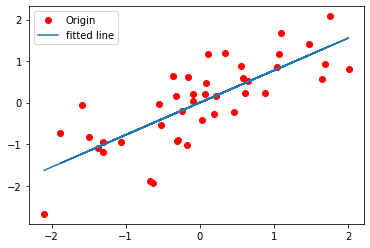

In [23]:
plt.plot(X_train, y_train, 'ro', label="Origin")
plt.plot(X_train, sess.run(W) * X_train + sess.run(b), label="fitted line")
plt.legend()
plt.show()

In [24]:
sess.close()